In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv("student_loan_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

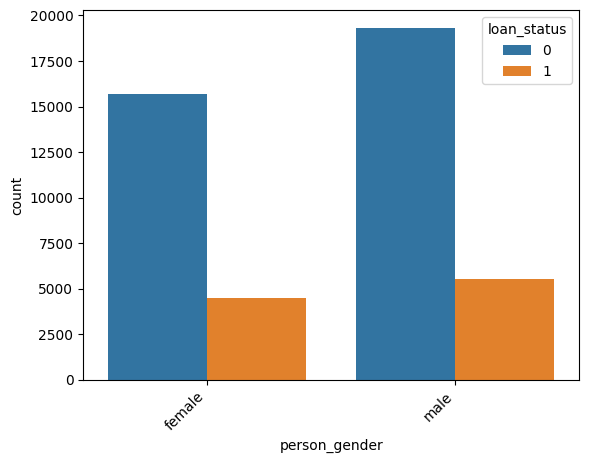

In [7]:
import seaborn as sns

sns.countplot(data=data,x='person_gender',hue='loan_status')
plt.xticks(rotation=45, ha='right');

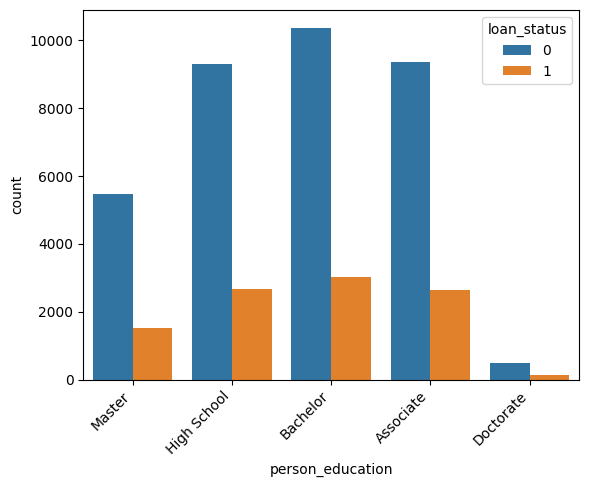

In [8]:
sns.countplot(data=data,x='person_education',hue='loan_status')
plt.xticks(rotation=45, ha='right');

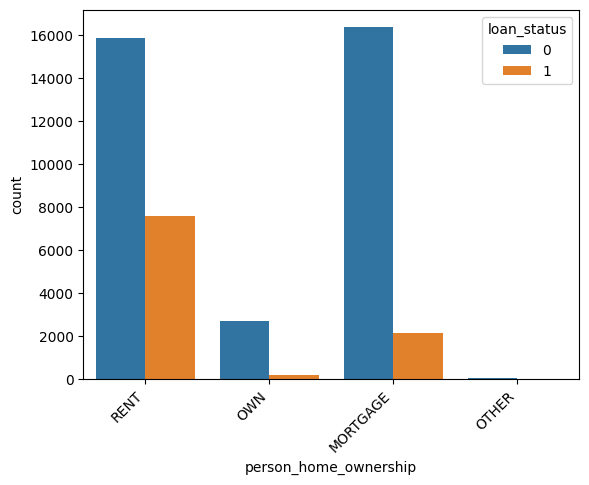

In [9]:
sns.countplot(data=data,x='person_home_ownership',hue='loan_status')
plt.xticks(rotation=45, ha='right');

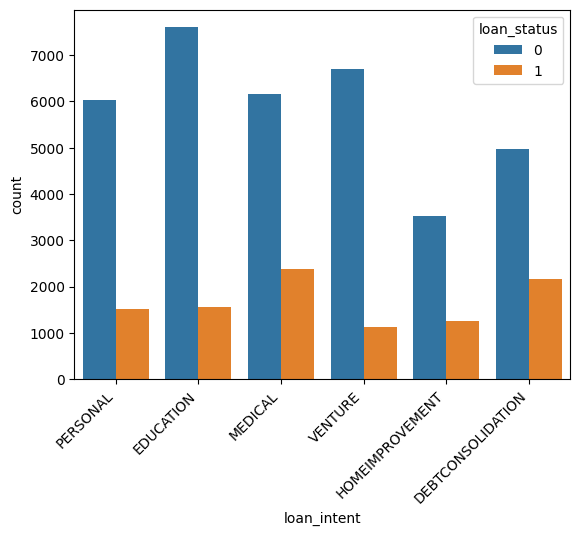

In [10]:
sns.countplot(data=data,x='loan_intent',hue='loan_status')
plt.xticks(rotation=45, ha='right');

In [71]:
#----------Method 0-------
pre_dt = pd.get_dummies(data, columns=['person_gender', 'person_education','person_home_ownership'
                                       ,'loan_intent','previous_loan_defaults_on_file'], drop_first = True)
pre_dt.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [ ]:
#----------Method 1-------
pre_dt = pd.get_dummies(data, columns=['loan_intent'], drop_first = True)
pre_dt.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,female,Master,71948.0,0,RENT,35000.0,16.02,0.49,3.0,561,No,1,False,False,False,True,False
1,21.0,female,High School,12282.0,0,OWN,1000.0,11.14,0.08,2.0,504,Yes,0,True,False,False,False,False
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,12.87,0.44,3.0,635,No,1,False,False,True,False,False
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,15.23,0.44,2.0,675,No,1,False,False,True,False,False
4,24.0,male,Master,66135.0,1,RENT,35000.0,14.27,0.53,4.0,586,No,1,False,False,True,False,False


In [72]:
#----------Run if Method 0--------
X = pre_dt.drop('loan_status', axis=1)
y = pre_dt['loan_status']
print(len(pre_dt))
print(len(pre_dt))
X

45000
45000


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,False,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,False,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,False,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,False,True,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,True,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,True,False,...,False,False,False,True,False,False,True,False,False,False
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,False,False,...,False,False,False,True,False,True,False,False,False,False
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,True,False,...,False,False,False,True,False,False,False,False,False,False
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,True,True,...,False,False,False,True,True,False,False,False,False,False


In [ ]:
#-------Run if Method 1-----
X = pre_dt.drop(['previous_loan_defaults_on_file','loan_status','person_gender', 'person_education','person_home_ownership'], axis=1)
y = pre_dt['loan_status']
print(len(pre_dt))
print(len(pre_dt))
X

45000
45000


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,False,False,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,True,False,False,False,False
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,False,False,True,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,False,False,True,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,False,False,True,False,False
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,False,True,False,False,False
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,False,False,False,False,False
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,True,False,False,False,False


In [73]:
model = GaussianNB()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 42)

In [76]:
#----------Data Scaling----------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [65]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
#--------Execute cell if data is scaled-------
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy of the model is {round(accuracy*100, 2)}")
print(f"F1 Score of the model is {f1}")

Accuracy of the model is 79.64
F1 Score of the model is 0.34053275737940963


In [80]:
#--------for scalled data------
accuracy = accuracy_score(y_test, y_pred_scaled)
f1 = f1_score(y_test, y_pred_scaled)
print(f"Accuracy of the model is {round(accuracy*100, 2)}")
print(f"F1 Score of the model is {f1}")

Accuracy of the model is 77.67
F1 Score of the model is 0.0


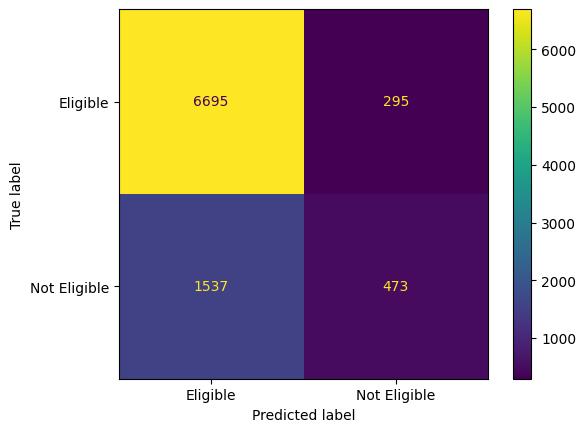

In [83]:
labels = ['Eligible', 'Not Eligible']
con = confusion_matrix(y_test, y_pred)
#con = confusion_matrix(y_test, y_pred_scaled) ----For scaled data
disp = ConfusionMatrixDisplay(confusion_matrix = con, display_labels = labels)
disp.plot();